# 数据预处理和特征工程

数据的质量涉及多个方面，包括准确性、完整性、一致性、时效性等。在真实数据中，往往包含了大量缺失值，噪声，以及人为因素导致的误差或异常点；数据的质量，决定了模型预测和泛化能力的上限。而针对中文文本数据，往往需要进行中文分词，中文分词不准确，将造成偏差过高。因此在对社交媒体文本数据训练模型之前需要数据预处理与中文分词。

本章项目尝试分别使用不同的方法进行数据预处理以及中文分词和特征分析。

相关的第三方库：pandas matplotlib seaborn sklearn .etc

使用数据：

案例数据：data-test.csv

丁香园疫情数据： DXYOverall.csv

使用Filter、Wrapper和Embedded进行特征选择；然后使用PCA方法进行降维

## 数据简介

本次实验使用的测试数据集来源于丁香园2019新型冠状病毒疫情全体数据的局部样本。丁香园全体数据共9770个样本，每个样本41个特征。本实验只抽取了28个样本数据，每个样本6个特征。

实验任务介绍：

本次实验我们将对数据集进行缺失值处理，我们将以confirmedCount、curedCount和deadCount这三个特征为例，进行数据预处理的教学。

## 第三方库

本实验使用到的框架主要包括numpy，pandas，matplotlib，seaborn库。

numpy ，pandas库是Python中结构化数据处理的库，主要用于结构化数据的统计分析及操作；

matplotlib，seaborn主要用于数据分析过程的可视化展示。

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style="darkgrid")

sns.set_style(style="darkgrid")

实现控制matplotlib图表的外观，Seaborn模块自带许多定制的主题和高级的接口

    1.darkgrid（灰色网格）
    2.whitegrid（白色网格）
    3.dark（黑色）
    4.white（白色）
    5.ticks（十字叉）

## 数据读取

In [72]:
#测试数据读取
raw_df = pd.read_csv(r"data-test.csv",encoding="utf8")
#输出前两行数据，不加参数默认输出前5行
raw_df.head(5)

,ID,confirmedCount,curedCount,deadCount,updateTime,rating
0,1,81054.0,67024,3204.0,1.580000e+12,3
1,2,81054.0,-1,3204.0,1.580000e+12,3
2,3,81054.0,67024,3204.0,1.580000e+12,3
3,4,81054.0,67024,3204.0,1.580000e+12,3
4,5,81054.0,67024,NaN,1.580000e+12,3


In [73]:
# 丁香园的疫情数据
DXY_raw_df =pd.read_csv(r"DXYOverall.csv",encoding="utf8")
#输出前两行数据，不加参数默认输出前5行
DXY_raw_df.head(4)

,dailyPic,dailyPics,summary,countRemark,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,...,globalOtherTrendChartData,updateTime,suspectedIncr,currentConfirmedIncr,confirmedIncr,curedIncr,deadIncr,seriousIncr,yesterdayConfirmedCountIncr,yesterdaySuspectedCountIncr
0,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2582.0,99667,4572,92275,4810,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-23 02:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2582.0,99667,4572,92275,4810,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-23 00:02:56,9.0,124.0,253.0,127.0,2.0,84.0,NaN,NaN
2,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2582.0,99667,4572,92275,4810,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-22 23:40:08,9.0,124.0,253.0,127.0,2.0,84.0,175.0,9.0
3,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2581.0,99666,4572,92275,4810,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-22 19:27:02,9.0,123.0,252.0,127.0,2.0,84.0,175.0,9.0


# 数据预处理

缺失值处理的常见方法有：

    1删除：dropna();
    2.填充：填充包括统计量填充（众数、均值、中位数）、KNN填充等。常用方法包括：fillna()与Python的sklearn.preprocessing库中的Imputer类可对缺失值进行众数、均值、中位数填充。
    3.不处理

对于本次实验的丁香园全体数据集和任务，应该对于缺失值进行删除还是填充操作呢？

## 步骤 1	  查看缺失值

pandas中，isnull()是常用的缺失值查看方法：

    df.isnull():查看所有数据是否为缺失值，返回bool值。True：缺失值；False：不是缺失值。
    df.isnull().any():查看每个特征是否存在缺失值，返回bool值。
    df.isnll().sum():返回每个特征中缺失值的具体数量。

In [74]:
# 测试数据中，查看前5个样本中，数据是否为缺失值。
raw_df.head().isnull()

,ID,confirmedCount,curedCount,deadCount,updateTime,rating
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,True,False,False


In [75]:
# 丁香园数据中检查前15条样本中是否有缺失值
DXY_raw_df.head().isnull()
DXY_raw_df.head(15)

,dailyPic,dailyPics,summary,countRemark,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,...,globalOtherTrendChartData,updateTime,suspectedIncr,currentConfirmedIncr,confirmedIncr,curedIncr,deadIncr,seriousIncr,yesterdayConfirmedCountIncr,yesterdaySuspectedCountIncr
0,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2582.0,99667,4572,92275,4810,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-23 02:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2582.0,99667,4572,92275,4810,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-23 00:02:56,9.0,124.0,253.0,127.0,2.0,84.0,NaN,NaN
2,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2582.0,99667,4572,92275,4810,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-22 23:40:08,9.0,124.0,253.0,127.0,2.0,84.0,175.0,9.0
3,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2581.0,99666,4572,92275,4810,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-22 19:27:02,9.0,123.0,252.0,127.0,2.0,84.0,175.0,9.0
4,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2577.0,99662,4572,92275,4810,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-22 19:19:03,9.0,119.0,248.0,127.0,2.0,84.0,175.0,9.0
5,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2577.0,99662,4572,92275,4810,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-22 19:16:40,9.0,119.0,248.0,127.0,2.0,84.0,175.0,9.0
6,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2575.0,99654,4572,92269,4810,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-22 19:14:19,9.0,117.0,240.0,121.0,2.0,84.0,175.0,9.0
7,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2559.0,99593,4572,92225,4809,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-22 19:07:22,9.0,101.0,179.0,77.0,1.0,84.0,175.0,9.0
8,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2561.0,99593,4572,92223,4809,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-22 19:02:49,9.0,103.0,179.0,75.0,1.0,84.0,175.0,9.0
9,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,2558.0,99590,4572,92223,4809,929.0,...,https://file1.dxycdn.com/2021/0122/747/7131623...,2021-01-22 18:50:41,9.0,100.0,176.0,75.0,1.0,84.0,175.0,9.0


查看每个特征是否存在缺失值

In [76]:
print("测试数据判断每个特征是否存在缺失值")
print(raw_df.isnull().any())

print("丁香园数据判断每个特征是否存在缺失值")
DXY_raw_df.isnull().any()

测试数据判断每个特征是否存在缺失值
ID                False
confirmedCount     True
curedCount        False
deadCount          True
updateTime        False
rating            False
dtype: bool
丁香园数据判断每个特征是否存在缺失值


dailyPic                             True
dailyPics                            True
summary                              True
countRemark                          True
currentConfirmedCount                True
confirmedCount                      False
suspectedCount                      False
curedCount                          False
deadCount                           False
seriousCount                         True
remark1                             False
remark2                             False
remark3                              True
remark4                              True
remark5                              True
note1                                True
note2                                True
note3                                True
generalRemark                        True
abroadRemark                         True
marquee                              True
quanguoTrendChart                    True
hbFeiHbTrendChart                    True
foreignTrendChart                 

查看每个特征缺失值的总数

In [77]:
print("测试数据缺失总数")
print(raw_df.isnull().sum())

print("\n丁香园")
DXY_raw_df.isnull().sum()

测试数据缺失总数
ID                0
confirmedCount    1
curedCount        0
deadCount         3
updateTime        0
rating            0
dtype: int64

丁香园


dailyPic                               2
dailyPics                            333
summary                             9765
countRemark                         9672
currentConfirmedCount                875
confirmedCount                         0
suspectedCount                         0
curedCount                             0
deadCount                              0
seriousCount                         280
remark1                                0
remark2                                0
remark3                              314
remark4                             9767
remark5                             9769
note1                                350
note2                                350
note3                                350
generalRemark                        504
abroadRemark                        9767
marquee                              279
quanguoTrendChart                    709
hbFeiHbTrendChart                    709
foreignTrendChart                   1810
importantForeign

在介绍完三种查看缺失值的方法后，对于本次任务来说，哪种方法更加合适呢？

## 步骤 2 	缺失值填充
本次实验我们选择统计量填充方法。统计量填充的选择标准：

    对于连续值，推荐使用中位数，可以排除一些特别大或者特别小的异常值造成的影响；
    对于离散值，推荐使用众数。
    对于confirmedCount，我们应该哪种统计量填充方法呢？¶

使用Python中pandas库的dropna()函数，其基本格式如下：

**naDataFrame.fill(value=None, method=None, axis=None, inplace=False, limit=None)**

关键参数详解：

    value: 特定填充值
    method: 差值方式：
    pad/ffill：用前一个非缺失值去填充该缺失值
    backfill/bfill：用下一个非缺失值填充该缺失值
    None：指定一个值去替换缺失值（缺省默认这种方式）
    axis: 默认为0。axis=0代表d对行数据进行操作，axis=1代表列数据
    inplace=True/False：Boolean数据, 默认为False。inplace=True代表直接对原数据集N做出修改。
    limit : 阈值。超过阈值才填充该行或该列。

观察疫情数据样本的deadCount，发现经常出现连续多天数值不变，因此用前一个非缺失值去填充该缺失值。

In [78]:
raw_df["deadCount"] = raw_df["deadCount"].ffill()
raw_df["deadCount"]

0     3204.0
1     3204.0
2     3204.0
3     3204.0
4     3204.0
5     3204.0
6     3204.0
7     3204.0
8     3204.0
9     3204.0
10    3204.0
11    3204.0
12    3204.0
13    3204.0
14    3204.0
15    3204.0
16    3204.0
17    3204.0
18    3204.0
19    3194.0
20    3194.0
21      26.0
22      26.0
23      26.0
24      26.0
25      26.0
26      26.0
27      26.0
Name: deadCount, dtype: float64

丁香园的数据缺失情况：![](Pic/res.JPG)

![](Pic/res2.JPG)
对于丁香园的数据，同理的有

    currentConfirmedCount
    seriouscount


In [79]:
DXY_raw_df['seriousCount'] = DXY_raw_df['seriousCount'].ffill()
print(DXY_raw_df['seriousCount'])

DXY_raw_df['currentConfirmedCount'] = DXY_raw_df['currentConfirmedCount'].ffill()
print(DXY_raw_df['currentConfirmedCount'])

DXY_raw_df['remark3'] = DXY_raw_df['remark3'].ffill()
print(DXY_raw_df['remark3'])

# 对于suspectedIncr维度，尝试backfill模式，下面补充上面
DXY_raw_df['suspectedIncr'] = DXY_raw_df['suspectedIncr'].backfill()
print(DXY_raw_df['suspectedIncr'])

0       929.0
1       929.0
2       929.0
3       929.0
4       929.0
        ...  
9764      0.0
9765      0.0
9766      0.0
9767      0.0
9768      0.0
Name: seriousCount, Length: 9769, dtype: float64
0        2582.0
1        2582.0
2        2582.0
3        2581.0
4        2577.0
         ...   
9764    38583.0
9765    38583.0
9766    38583.0
9767    38583.0
9768    38583.0
Name: currentConfirmedCount, Length: 9769, dtype: float64
0       宿主：野生动物，可能为中华菊头蝠
1       宿主：野生动物，可能为中华菊头蝠
2       宿主：野生动物，可能为中华菊头蝠
3       宿主：野生动物，可能为中华菊头蝠
4       宿主：野生动物，可能为中华菊头蝠
              ...       
9764           是否有治愈人数：否
9765           是否有治愈人数：否
9766           是否有治愈人数：否
9767           是否有治愈人数：否
9768           是否有治愈人数：否
Name: remark3, Length: 9769, dtype: object
0       9.0
1       9.0
2       9.0
3       9.0
4       9.0
       ... 
9764    NaN
9765    NaN
9766    NaN
9767    NaN
9768    NaN
Name: suspectedIncr, Length: 9769, dtype: float64


可以看到，数据得到了相关的处理，相关维度的部分空缺值得到了相应的填充

# 步骤 3	  缺失值删除

使用Python中pandas库的dropna()函数，其基本格式如下：

**DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)**

关键参数详解：

    axis=0/1，默认为0。axis=0代表d对行数据进行操作，axis=1代表列数据。
    how=any/all，默认为any。how=any代表若某行或某列中存在缺失值，则删除该行或该列。
    how=all:若某行或某列中数值全部为空，则删除该行或该列。
    thresh=N，可选参数，代表若某行或某列中至少含有N个缺失值，则删除该行或该列。
    subset=列名，可选参数，代表若指定列中有缺失值，则删除该行。
    inplace=True/False，Boolean数据, 默认为False。inplace=True代表直接对原数据集N做出修改。
    inplace=False代表修改后生成新数据集M，原数据集N保持不变。

In [80]:
#样例测试
non_na_df = raw_df.dropna()
non_na_df

,ID,confirmedCount,curedCount,deadCount,updateTime,rating
0,1,81054.0,67024,3204.0,1.580000e+12,3
1,2,81054.0,-1,3204.0,1.580000e+12,3
2,3,81054.0,67024,3204.0,1.580000e+12,3
3,4,81054.0,67024,3204.0,1.580000e+12,3
4,5,81054.0,67024,3204.0,1.580000e+12,3
5,6,81048.0,67024,3204.0,1.580000e+12,3
6,7,81048.0,67024,3204.0,1.580000e+12,3
7,8,81048.0,67023,3204.0,1.580000e+12,3
8,9,81048.0,6702200,3204.0,1.580000e+12,3
9,10,81048.0,67022,3204.0,1.580000e+12,3


In [81]:
#丁香园
# 观察数据，发现
DXY_non_raw_df = DXY_raw_df.dropna(axis=1)
DXY_non_raw_df

,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,remark1,remark2,remark3,updateTime
0,2582.0,99667,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-23 02:03:00
1,2582.0,99667,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-23 00:02:56
2,2582.0,99667,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-22 23:40:08
3,2581.0,99666,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-22 19:27:02
4,2577.0,99662,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-22 19:19:03
...,...,...,...,...,...,...,...,...,...,...
9764,38583.0,894,1076,35,26,0.0,病毒是否变异：存在可能,疫情是否扩散：是,是否有治愈人数：否,2020-01-24 19:50:40
9765,38583.0,887,1076,35,26,0.0,病毒是否变异：存在可能,疫情是否扩散：是,是否有治愈人数：否,2020-01-24 19:13:14
9766,38583.0,887,1076,35,26,0.0,病毒是否变异：存在可能,疫情是否扩散：是,是否有治愈人数：否,2020-01-24 18:09:33
9767,38583.0,887,1075,35,26,0.0,病毒是否变异：存在可能,疫情是否扩散：是,是否有治愈人数：否,2020-01-24 17:26:07


注意：上面的实际数据，预处理需要对列处理而不是对行处理，否则可能出现表格为空的结果！因为给出的有一些列的数据是空的，我们需要对空的列进行处理。

**当删除掉不需要的行时，行索引会变的不连续，这时候可以重新设计新的索引**

In [82]:
# 测试数据
#当删除掉不需要的行时，行索引会变的不连续，这时候可以重新设计新的索引
non_na_df.reset_index(drop=True,inplace=True)#drop=True：删除原行索引；inplace=True:在数据上进行更新
#检查数据集中是否含有缺失值
non_na_df.isnull().any()

ID                False
confirmedCount    False
curedCount        False
deadCount         False
updateTime        False
rating            False
dtype: bool

In [83]:
# 丁香园数据
DXY_non_raw_df.reset_index(drop=True,inplace=True)#drop=True：删除原行索引；inplace=True:在数据上进行更新
#检查数据集中是否含有缺失值
DXY_non_raw_df.isnull().any()

currentConfirmedCount    False
confirmedCount           False
suspectedCount           False
curedCount               False
deadCount                False
seriousCount             False
remark1                  False
remark2                  False
remark3                  False
updateTime               False
dtype: bool

In [84]:
# 查看丁香园处理后的数据
DXY_non_raw_df

,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,remark1,remark2,remark3,updateTime
0,2582.0,99667,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-23 02:03:00
1,2582.0,99667,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-23 00:02:56
2,2582.0,99667,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-22 23:40:08
3,2581.0,99666,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-22 19:27:02
4,2577.0,99662,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-22 19:19:03
...,...,...,...,...,...,...,...,...,...,...
9764,38583.0,894,1076,35,26,0.0,病毒是否变异：存在可能,疫情是否扩散：是,是否有治愈人数：否,2020-01-24 19:50:40
9765,38583.0,887,1076,35,26,0.0,病毒是否变异：存在可能,疫情是否扩散：是,是否有治愈人数：否,2020-01-24 19:13:14
9766,38583.0,887,1076,35,26,0.0,病毒是否变异：存在可能,疫情是否扩散：是,是否有治愈人数：否,2020-01-24 18:09:33
9767,38583.0,887,1075,35,26,0.0,病毒是否变异：存在可能,疫情是否扩散：是,是否有治愈人数：否,2020-01-24 17:26:07


#  重复值处理

pandas中，除去重复值的常用方法为drop_duplicate，其基本格式如下：

**DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)：**

关键参数详解：

    subset:用来指定特定的列，默认所有列；
    keep: {'first', 'last', False}。默认值为'first'，用于删除重复项并保留第一次出现的项；
    inplace:是直接在原来数据上修改还是保留一个副本，默认是False

测试代码如下：

In [85]:
# 测试样例文档
non_na_df_cp = non_na_df.drop_duplicates(['confirmedCount', 'curedCount'],keep='last')
non_na_df_cp

,ID,confirmedCount,curedCount,deadCount,updateTime,rating
1,2,81054.0,-1,3204.0,1.580000e+12,3
4,5,81054.0,67024,3204.0,1.580000e+12,3
6,7,81048.0,67024,3204.0,1.580000e+12,3
7,8,81048.0,67023,3204.0,1.580000e+12,3
8,9,81048.0,6702200,3204.0,1.580000e+12,3
11,13,81048.0,67022,3204.0,1.580000e+12,3
13,15,81047.0,67011,3204.0,1.580000e+12,3
14,16,81043.0,67011,3204.0,1.580000e+12,3
15,17,81038.0,67007,3204.0,1.580000e+12,3
16,18,81037.0,67004,3204.0,1.580000e+12,3


注意：对于丁香园的数据，如果不对相关维度去重，由于存在updateTime维度，不同时间必然导致无法去重的问题

In [86]:
DXY_non_raw_df = DXY_non_raw_df.drop_duplicates(['currentConfirmedCount','confirmedCount','suspectedCount','curedCount','deadCount','seriousCount'],keep='last')
DXY_non_raw_df

,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,remark1,remark2,remark3,updateTime
2,2582.0,99667,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-22 23:40:08
3,2581.0,99666,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-22 19:27:02
5,2577.0,99662,4572,92275,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-22 19:16:40
6,2575.0,99654,4572,92269,4810,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-22 19:14:19
7,2559.0,99593,4572,92225,4809,929.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,2021-01-22 19:07:22
...,...,...,...,...,...,...,...,...,...,...
9762,38583.0,896,1076,36,26,0.0,病毒是否变异：存在可能,疫情是否扩散：是,是否有治愈人数：否,2020-01-24 21:38:54
9763,38583.0,894,1076,36,26,0.0,病毒是否变异：存在可能,疫情是否扩散：是,是否有治愈人数：否,2020-01-24 20:45:17
9764,38583.0,894,1076,35,26,0.0,病毒是否变异：存在可能,疫情是否扩散：是,是否有治愈人数：否,2020-01-24 19:50:40
9766,38583.0,887,1076,35,26,0.0,病毒是否变异：存在可能,疫情是否扩散：是,是否有治愈人数：否,2020-01-24 18:09:33


可以看到行索引又发生了变化，实现了去重

# 异常值处理

异常值检测和处理异常值。 异常值检测的方法主要有：

    1）简单统计分析；
    2）散点图；
    3）箱型图；
    4）3-sigma；
    5）基于模型的异常值检测等。

本实验只试验1）和2），其他方法请线下进行调研和试验。

异常值处理的方法主要包括：
    1）删除；
    2）视为缺失值，进行处理；
    3）不处理：可以直接在具有异常值的数据集上进行数据建模。

下面我们将根据一个含有异常值的特征数据，来处理特征的异常值。

data-test.csv 测试代码：

In [87]:
curedcount_copy = non_na_df.copy()
#查看特征信息
curedcount_copy["curedCount"]

0       67024
1          -1
2       67024
3       67024
4       67024
5       67024
6       67024
7       67023
8     6702200
9       67022
10      67022
11      67022
12      67011
13      67011
14      67011
15      67007
16      67004
17      65686
18      65680
19      65680
20         36
21         36
22         35
23         35
24         35
25         35
26         35
Name: curedCount, dtype: int64

curedCount数据是int64的，经过观察，发现数据1最小数值和数据8最大数值似乎存在异常，需要进行处理。
对于丁香园的数据进行查看：

In [88]:
DXY_curedcount_copy = DXY_non_raw_df.copy()
#查看特征信息
DXY_curedcount_copy["deadCount"]


2       4810
3       4810
5       4810
6       4810
7       4809
        ... 
9762      26
9763      26
9764      26
9766      26
9768      26
Name: deadCount, Length: 3417, dtype: int64

In [89]:
# 查看数值的动态范围
print(DXY_curedcount_copy["deadCount"].to_frame().describe())
print('\n')
print(DXY_curedcount_copy["currentConfirmedCount"].to_frame().describe())

         deadCount
count  3417.000000
mean   2954.299093
std    1623.730451
min       0.000000
25%    1524.000000
50%    3173.000000
75%    4648.000000
max    4810.000000


       currentConfirmedCount
count            3417.000000
mean            22223.170910
std             21640.770137
min               104.000000
25%              1329.000000
50%             14875.000000
75%             38583.000000
max             58127.000000


面对比较多的数据时，往往看不清楚数据背后的异常情况，这时候我们尝试对数据进行可视化，
观察是否有一些数据存在异常的现象。下面直接对样例测试数据和丁香园的数据进行测试：


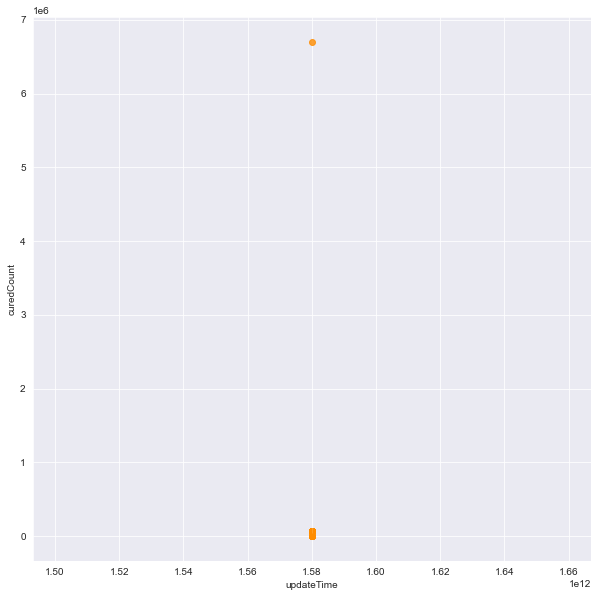

In [90]:
# test-data样例数据
plt.figure(figsize = (10,10))
sns.regplot(x="updateTime", y="curedCount", color='darkorange',data=curedcount_copy)
curedcount_copy.to_csv('data-test-1.1.csv') #保存文件

Text(0.5, 0, 'index')

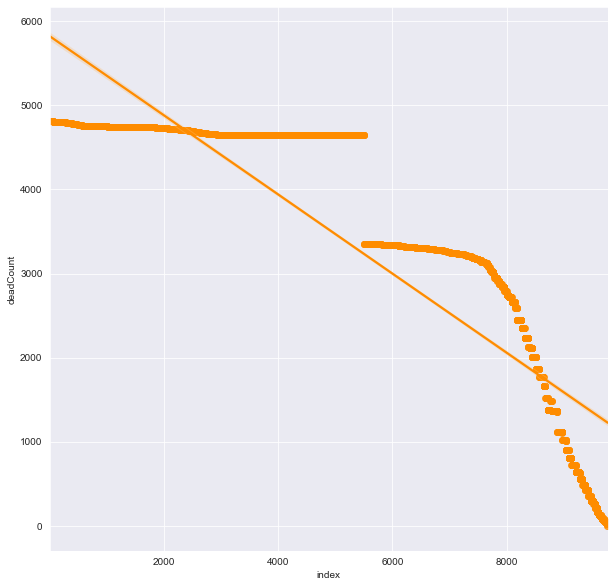

In [91]:
plt.figure(figsize = (10,10))
sns.regplot(x= DXY_curedcount_copy.index,y="deadCount", color='darkorange',data=DXY_curedcount_copy)
DXY_curedcount_copy.to_csv('DXY-1.1.csv') #保存文件
plt.xlabel("index")

上图尝试以横轴为索引，纵轴为deadCount实现对表格数据进行观测，发现一些问题看不清楚，如9754条的deadCount值为0是不符合情况的
对于currentConfirmedCount 维度尝试观察，发现下图，确实存在一些异常值。

Text(0.5, 0, 'index')

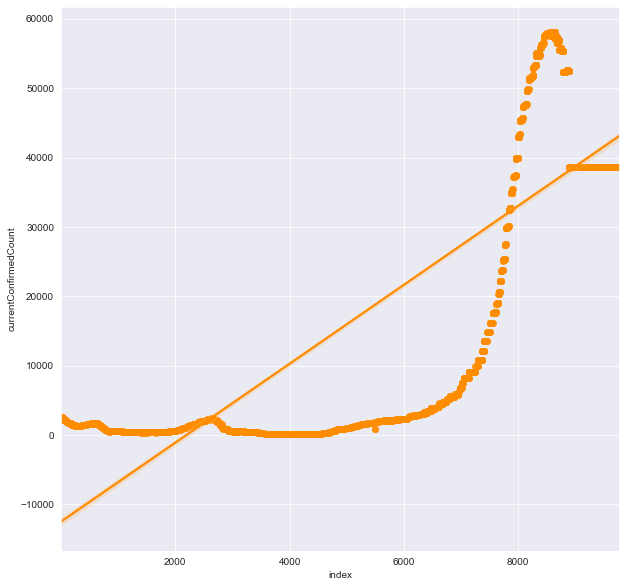

In [92]:
plt.figure(figsize = (10,10))
sns.regplot(x= DXY_curedcount_copy.index,y="currentConfirmedCount", color='darkorange',data=DXY_curedcount_copy)
plt.xlabel("index")

查表观察，发现currentConfirmedCount在5502和5503条出现了872和907，和附近的1872不符，出现异常
deadCount在9754条有一个数据为0，但是在散点图中看不出来，尝试用其他的维度观察

### 在检测到异常值后，对于本次任务来说，哪种处理方法更加合适呢？

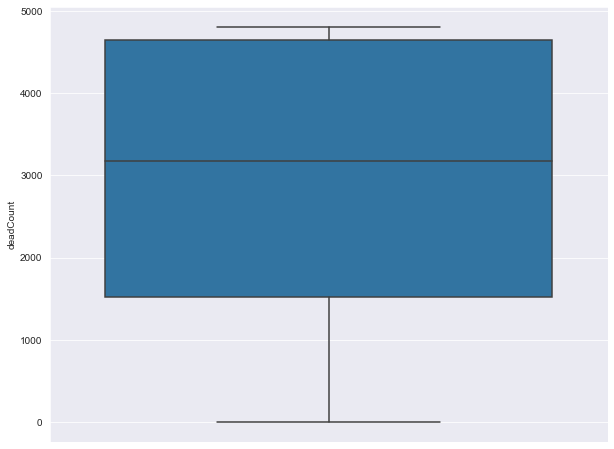

In [93]:
df = DXY_curedcount_copy
f,ax=plt.subplots(figsize=(10,8))
sns.boxplot(y='deadCount',data=df,ax=ax)
plt.show()

Text(0.5, 0, 'index')

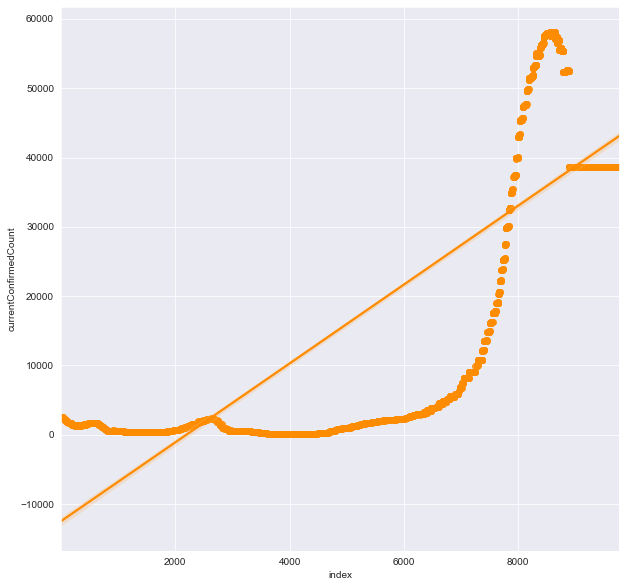

In [94]:
# 异常值处理
DXY_curedcount_copy['deadCount'].replace(0,np.nan,inplace=True)
# 变成缺失值再处理
DXY_curedcount_copy['deadCount'] = DXY_curedcount_copy['deadCount'].ffill()

DXY_curedcount_copy['currentConfirmedCount'].replace(872,np.nan,inplace=True, limit=1)
# 变成缺失值再处理
DXY_curedcount_copy['currentConfirmedCount'].replace(907,np.nan,inplace=True, limit=1)
DXY_curedcount_copy['currentConfirmedCount'] = DXY_curedcount_copy['currentConfirmedCount'].ffill()

plt.figure(figsize = (10,10))
sns.regplot(x= DXY_curedcount_copy.index,y="currentConfirmedCount", color='darkorange',data=DXY_curedcount_copy)
plt.xlabel("index")

重新拟合可以看到不符合的点消失了，表示清理成功。

#  特征工程

本次实验我们将介绍特征选择和降维技术，作为数据挖掘工程中的重要环节，两种技术都可以提升模型的性能、模型运行效率和数据的可用性。

特征选择和降维都是在数据建模之前，对原始数据特征进行选择或是压缩的重要环节，也是数据挖掘过程中非常需要处理技巧和消耗时间较多的环节。本章选择最常用的特征选择和降维方法进行练习，希望进一步加强读者对特征选择和降维方法的理解，帮助学生掌握常规的特征选择和降维方法。

本次实验将介绍Filter特征选择方法的使用。最后为介绍PCA的降维方法。

本部分包括两个实验：

    1、Filter特征选择方法；
    2、PCA降维。

## 特征选择

特征选择是从特征集中找出与目标变量有影响且具有较高区分性特征去训练模型，获得预测性能更好的模型。特征选择的主要作用：减少特征数量、降维，使模型泛化能力更强，减少过拟合；增强对特征和特征值之间的理解。

选择特征首先是考虑特征的发散性和相关性两方面：

    特征是否发散：如果一个特征不发散，例如方差接近于0，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用。
    特征与目标的相关性：优先选择与目标相关性高的特征。从特征的方差和相关性考虑。

特征选择方法有很多，主要包含特征减少和特征扩增。

这里我们主要介绍特征减少的操作。主要包括：Filter（过滤法）。

### Filter（过滤法）

Filter用来衡量每个特征对目标属性的重要性程度，以此来对所有特征/属性进行排序，或者进行优选操作，特征选择的过程和后续的学习器无关（区别于另外两个方法)。过滤法是一种单变量统计方法，没有考虑到特征之间的关系，因此很可能选择出重要但是冗余的特征。

**常用的具体技术有下述四种：方差选择法、卡方检验、互信息法和相关系数法。**

本实验只试验前两种方法，通过sklearn中的子模块中feature_selection的数据调用：

    方差选择法（调用VarianceThreshold方法）
    卡方检验法（调用SelectKBest函数）

过滤法的选择：

方差选择法：可以作为特征选择的预处理，先去掉那些取值变化小的特征，然后再从其他特征选择方法中选择合适的进行进一步的特征选择。

![](Pic/filt.JPG)

**步骤 1	数据读取**

注意读取预处理过的数据集，
否则空值和异常值将影响特征选择的效果或者导致特征选择失败。
代码：

In [95]:
# 测试的
raw_df = pd.read_csv("data-test-1.1.csv",index_col=0)#读取数据。index_col=0：读取时不自动添加行号。
raw_df.head()

,ID,confirmedCount,curedCount,deadCount,updateTime,rating
0,1,81054.0,67024,3204.0,1.580000e+12,3
1,2,81054.0,-1,3204.0,1.580000e+12,3
2,3,81054.0,67024,3204.0,1.580000e+12,3
3,4,81054.0,67024,3204.0,1.580000e+12,3
4,5,81054.0,67024,3204.0,1.580000e+12,3


In [96]:
# 去重
raw_data = raw_df.drop(["rating"], axis=1) #删除指定标签列
labels= raw_df["rating"]  #标签

下面对丁香园的数据进行处理：

In [97]:
DXY_raw_df = pd.read_csv("DXY-1.1.csv",index_col=0)#读取数据。index_col=0：读取时不自动添加行号。
print(DXY_raw_df.head())

DXY_raw_data = DXY_raw_df.drop(["remark1"], axis=1).drop(["remark2"], axis=1).drop(["remark3"], axis=1).drop(["updateTime"], axis=1) #删除指定标签列
DXY_raw_data.reset_index(drop=True,inplace=True)
DXY_raw_data

   currentConfirmedCount  confirmedCount  suspectedCount  curedCount  \
2                 2582.0           99667            4572       92275   
3                 2581.0           99666            4572       92275   
5                 2577.0           99662            4572       92275   
6                 2575.0           99654            4572       92269   
7                 2559.0           99593            4572       92225   

   deadCount  seriousCount                                   remark1  \
2       4810         929.0  易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病   
3       4810         929.0  易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病   
5       4810         929.0  易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病   
6       4810         929.0  易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病   
7       4809         929.0  易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病   

                                             remark2           remark3  \
2  潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...  宿主：野生动

,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount
0,2582.0,99667,4572,92275,4810,929.0
1,2581.0,99666,4572,92275,4810,929.0
2,2577.0,99662,4572,92275,4810,929.0
3,2575.0,99654,4572,92269,4810,929.0
4,2559.0,99593,4572,92225,4809,929.0
...,...,...,...,...,...,...
3412,38583.0,896,1076,36,26,0.0
3413,38583.0,894,1076,36,26,0.0
3414,38583.0,894,1076,35,26,0.0
3415,38583.0,887,1076,35,26,0.0


步骤 2	无量纲化

无量纲化的常用方法：

    标准化：标准化的前提是特征值服从正态分布，标准化后，其转换成标准正态分布。
    最大最小归一化：最小值-最大值归一化是将训练集中原始数据中特征的取值缩放到0到1之间。这种特征缩放方法实现对原始数据的等比例缩放，比较适用于数值比较集中的情况。

In [98]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler(copy=True)
data = pd.DataFrame(sc_X.fit_transform(DXY_raw_data))
data

,0,1,2,3,4,5
0,-0.907733,1.121838,-0.252044,1.235711,1.143030,-0.688813
1,-0.907779,1.121800,-0.252044,1.235711,1.143030,-0.688813
2,-0.907964,1.121647,-0.252044,1.235711,1.143030,-0.688813
3,-0.908057,1.121342,-0.252044,1.235541,1.143030,-0.688813
4,-0.908796,1.119014,-0.252044,1.234293,1.142414,-0.688813
...,...,...,...,...,...,...
3412,0.756083,-2.647541,-0.684599,-1.380381,-1.803703,-0.917106
3413,0.756083,-2.647617,-0.684599,-1.380381,-1.803703,-0.917106
3414,0.756083,-2.647617,-0.684599,-1.380409,-1.803703,-0.917106
3415,0.756083,-2.647884,-0.684599,-1.380409,-1.803703,-0.917106


###  步骤 3	方差选择法

首先我们用方差选择方作为特征选择的预处理。

In [99]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
#这里我们使用原始数据
labels = DXY_raw_data["currentConfirmedCount"]
data_after_var = VarianceThreshold(threshold=0.01).fit_transform(DXY_raw_data) #使用阈值0.01进行选择
data_after_var.shape

(3417, 6)

In [100]:
data_after_var = pd.concat([pd.DataFrame(data_after_var),labels],axis=1)
data_after_var.to_csv("data_after_var.csv")

### 步骤 4	皮尔森关系系数

对于数值数据我们，首先用皮尔森关系系数做特征选择。
皮尔森相关系数是一种最简单的、能帮助理解特征和标签变量之间关系的方法。
它衡量的是变量之间的线性相关性，其值在-1,1之间；其中1代表变量完全正相关，-1代表完全负相关。

**pearsonr(X,Y):**

    X：样本数据；
    Y：样本标签
    返回值：第一项是皮尔森相关系数，第二项是p_value值。一般来说皮尔森相关系数越大，p_value越小，线性相关性就越大

In [101]:
data_numerical =DXY_raw_data[["confirmedCount","suspectedCount","curedCount","deadCount","seriousCount"]]
data_numerical

,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount
0,99667,4572,92275,4810,929.0
1,99666,4572,92275,4810,929.0
2,99662,4572,92275,4810,929.0
3,99654,4572,92269,4810,929.0
4,99593,4572,92225,4809,929.0
...,...,...,...,...,...
3412,896,1076,36,26,0.0
3413,894,1076,36,26,0.0
3414,894,1076,35,26,0.0
3415,887,1076,35,26,0.0


In [102]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr

print(pearsonr(data_numerical["confirmedCount"],labels))
print(pearsonr(data_numerical["suspectedCount"], labels))
print(pearsonr(data_numerical["curedCount"], labels))
print(pearsonr(data_numerical["deadCount"],labels))
print(pearsonr(data_numerical["seriousCount"],labels))

(-0.5723262588120936, 1.2550285038726336e-296)
(0.5018266500136823, 1.948905146344039e-217)
(-0.9238383179630001, 0.0)
(-0.8193752038101727, 0.0)
(0.8404818693379088, 0.0)


根据皮尔森关系系数，你能判断特征的重要性吗？


如果特征比较多的话，用SelectKBest保留前k个特征（取top k)，方法具体为：

**sklearn.feature_selection.SelectKBest(score_func=<function f_classif>, k=10)**，

主要参数如下：

    score_func：选择卡方检验方法，其函数名称为chi2，并返回一对数组（得分，pvalues）或带有分数的单个数组。默认值为f_classif（适用于分类任务）。
    k：默认= 10，表示所选特征数。

主要属性为：

    scores_：array-like，shape =（n_features，），即该特征在该特征选择方法下的得分；
    pvalues_：array-like，shape =（n_features，），特征分数的p值，如果score_func仅返回分数，则为无。

**对于课上介绍的过滤法，本次实验的数据集和任务，哪种方法更合适呢？请描述清楚选择的依据。**

这里推荐使用的是皮尔逊关系系数法，
皮尔逊关系系数法得到的参数表格相对比较少，可以比较直观地看到某一个维度和另外几个维度彼此的关系，
用更少的参数展现出来。
得到两个参数r和p，其中 r值越大，p值越小，表示相关系数越显著。
其他的方式来看，得到的数据会以表的形式展现，数据相对比较多，
虽然可能会挖掘到更多的结果，但是不够直观。



In [103]:
data_numerical = SelectKBest(lambda X,Y:np.array(list(map(lambda x:pearsonr(x,Y),X.T))).T[0],k=2).fit_transform(data_numerical,labels)
data_numerical = pd.DataFrame(data_numerical,columns={"confirmedCount","curedCount"})
data_numerical.head()

,curedCount,confirmedCount
0,4572.0,929.0
1,4572.0,929.0
2,4572.0,929.0
3,4572.0,929.0
4,4572.0,929.0


## 降维

PCA的思想是将n维特征映射到k维上(k<n)，
这k维是全新的正交特征。
这k维特征称为主成分，是重新构造出来的k维特征，
而不是简单地从n维特征中去除其余n-k维特征（这也是与特征选择特征子集的方法的区别）。
在sklearn中，实现PCA降维的方法为：

**sklearn.decomposition.PCA(n_components=None, copy=True, svd_solver='auto')**

    n_components：PCA降维后的特征维度数目，或者是主成分的方差和所占的最小比例阈值。
    copy：表示是否将原始数据复制一份。默认为True，则运行PCA算法后，原始数据的值不会有任何改变。
    svd_solver：指定奇异值分解SVD的方法。有4个可以选择的值：{‘auto’, ‘full’, ‘arpack’, ‘randomized’}。
        'randomized' 一般适用于数据量大，数据维度多同时主成分数目比例又较低的PCA降维，它使用了一些加快SVD的随机算法。
        'full' 则是传统意义上的SVD，使用了scipy库对应的实现。
        'arpack' 和randomized的适用场景类似，区别是randomized使用的是scikit-learn自己的SVD实现，而arpack直接使用了scipy库的sparse SVD实现。当svd_solve设置为'arpack'时，保留的成分必须少于特征数，即不能保留所有成分。
        默认是'auto'，即PCA类会自己去在前面讲到的三种算法里面去权衡，选择一个合适的SVD算法来降维。一般来说，使用默认值就够了。

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
data_after_pca=pd.DataFrame(pca.fit_transform(data))
data_after_pca

,0,1
0,-2.243030,-0.101300
1,-2.243035,-0.101335
2,-2.243054,-0.101471
3,-2.242892,-0.101640
4,-2.241409,-0.103015
...,...,...
3412,2.351507,-1.534630
3413,2.351537,-1.534665
3414,2.351551,-1.534664
3415,2.351657,-1.534787


经过PCA降维后，我们将多维的特征转换为2维的特征，同时保存了85%较高的的信息量。

### 步骤 2	可视化

In [105]:
scaled_labels = pd.DataFrame(labels.astype("int"),columns={"currentConfirmedCount"})
data_after_pca_withlabels = pd.concat([data_after_pca,labels],axis=1)
data_after_pca_withlabels.to_csv("after_pca.csv")
data_after_pca_withlabels.head()

,0,1,currentConfirmedCount
0,-2.243030,-0.101300,2582.0
1,-2.243035,-0.101335,2581.0
2,-2.243054,-0.101471,2577.0
3,-2.242892,-0.101640,2575.0
4,-2.241409,-0.103015,2559.0


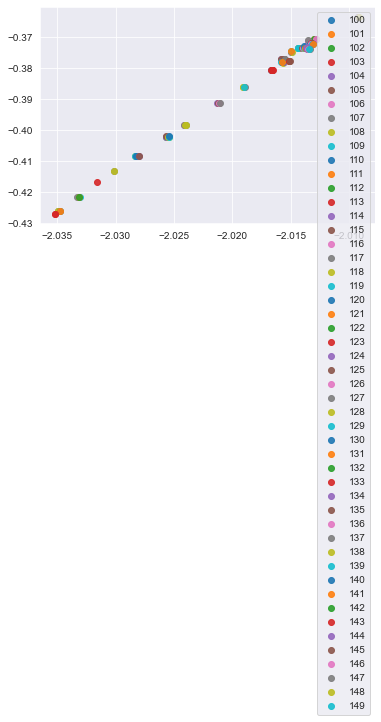

In [106]:
import matplotlib.pyplot as plt
def draw_graph(X):
    for i in range(100,150):
        plt.scatter(data_after_pca_withlabels.loc[data_after_pca_withlabels.currentConfirmedCount==i,0],
                    data_after_pca_withlabels.loc[data_after_pca_withlabels.currentConfirmedCount==i,1], alpha=0.9, label='%s' % i)
    plt.legend()
    plt.show()
draw_graph(data)

注意参数i和currentConfirmedCount有关,由于本维度选取是对currentConfirmedCount执行，而该维度数据比较多且不同，
因此不适用作图展示。观察到参数50条，不同颜色，但是currentConfirmedCount总体和对应的度量依然是相关的，
随着currentConfirmedCount增加对应的度量值也出现增加的线性相关，而且到x=-2.015越来越密，表现出数据聚集的或者对应相同的度量值较多。

也可以选择修整参数观测。